<a href="https://colab.research.google.com/github/BaraahAbuAbadi/DS_Smoker_or_not/blob/main/DS_Smoker_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge of the Week - ML Workflow

© 2024 Zaka AI, Inc. All Rights Reserved.

---

## Part A: Adaboost

After doing your research and understanding about adaboost, please answer the following questions.
Just write the choice letter (a,b,c,d) in a list, as provided in the sample answer below.

**Sample Answer:**<br>
* q1 = ["f"] (for one response)
* q2 = ["h", "g"] (for several responses)

**Q1: Adaboost is classified as which kind of ensemble method?**
* a) Bagging
* b) Boosting
* c) Stacking
* d) All of the above


**Q2: How do we combine the results of individual weak learners in AdaBoost?**
* a) By averaging the predictions of weak learners
* b) By multiplying the predictions of weak learners
* c) By taking the majority vote of weak learners
* d) By weighting the predictions of weak learners based on their accuracy

**Q3: Can Adaboost be used for regression?**
* a) Yes
* b) No
* c) Maybe

**Q4: Which of the following algorithms cannot be used with Adaboost**
* a) SVM
* b) Decision Tree
* c) k-means
* d) Apriori
* e) None of the above cannot be used with Adaboost

**Q5: What is the purpose of updating the sample weights in Adaboost?**
* a) To reduce the importance of samples that were correctly classified by the weak classifier
* b) To give more importance to samples that were misclassified by the weak classifier
* c) To give equal importance to all samples in the training set
* d) To give more importance to samples that are difficult to classify

**Q6: How many times does the training of weak classifiers and the updating of sample weights occur in the Adaboost algorithm?**
* a) Once
* b) Twice
* c) Until the desired number of weak classifiers is reached
* d) Until a stopping criteria is reached

In [ ]:
q1 = ["b"]
q2 = ["d"]
q3 = ["a"]
q4 = ["c"]
q5 = ["b"]
q6 = ["d"]


## Part B: Case Study: Classifying Smokers vs Non Smokers

**Objective:**

In this challenge, you will work on a dataset that you saw during week 1 but this time with different aspect. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Load the data

You can find the dataset [here](https://drive.google.com/file/d/1Mzp81y5b6JeqecIoI3CuUlrv86PTHJqU/view?usp=share_link). Download it and load it to your colab environment using pd.read_csv('filename.csv')

#### Read & visualize data
Data now is stored on disk in a csv (Comma Separated Values) file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.

In [ ]:
# read CSV file in Pandas
# path = '/content/insurance (2).csv'
# data = pd.read_csv(path)

!git clone https://github.com/BaraahAbuAbadi/DS_Smoker_or_not
%cd DS_Smoker_or_not/data/
data = pd.read_csv('insurance.csv')

# display first 5 rows
data.head()

Cloning into 'DS_Smoker_or_not'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 17.40 KiB | 1.02 MiB/s, done.
/content/DS_Smoker_or_not/DS_Smoker_or_not/data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[0]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 1338 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
columns_with_missing_values = data.columns[data.isnull().any()]
print(columns_with_missing_values)

Index(['bmi'], dtype='object')


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
mean_bmi = 30.661423

In [ ]:
std_bmi =6.101038

#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [ ]:
# select smokers
smokers = data[data['smoker'] == 'yes']

# select non smokers
non_smokers = data[data['smoker'] == 'no']

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


From these results it is clear that we have an imbalance in our dataset that we will try to resolve later.

### Exploratory Data Analysis

Let's start by seeing how much each feature tells us about a person being  a smoker or not, and tell about the most significant feature (just write the name of that feature as it appears in the dataset)

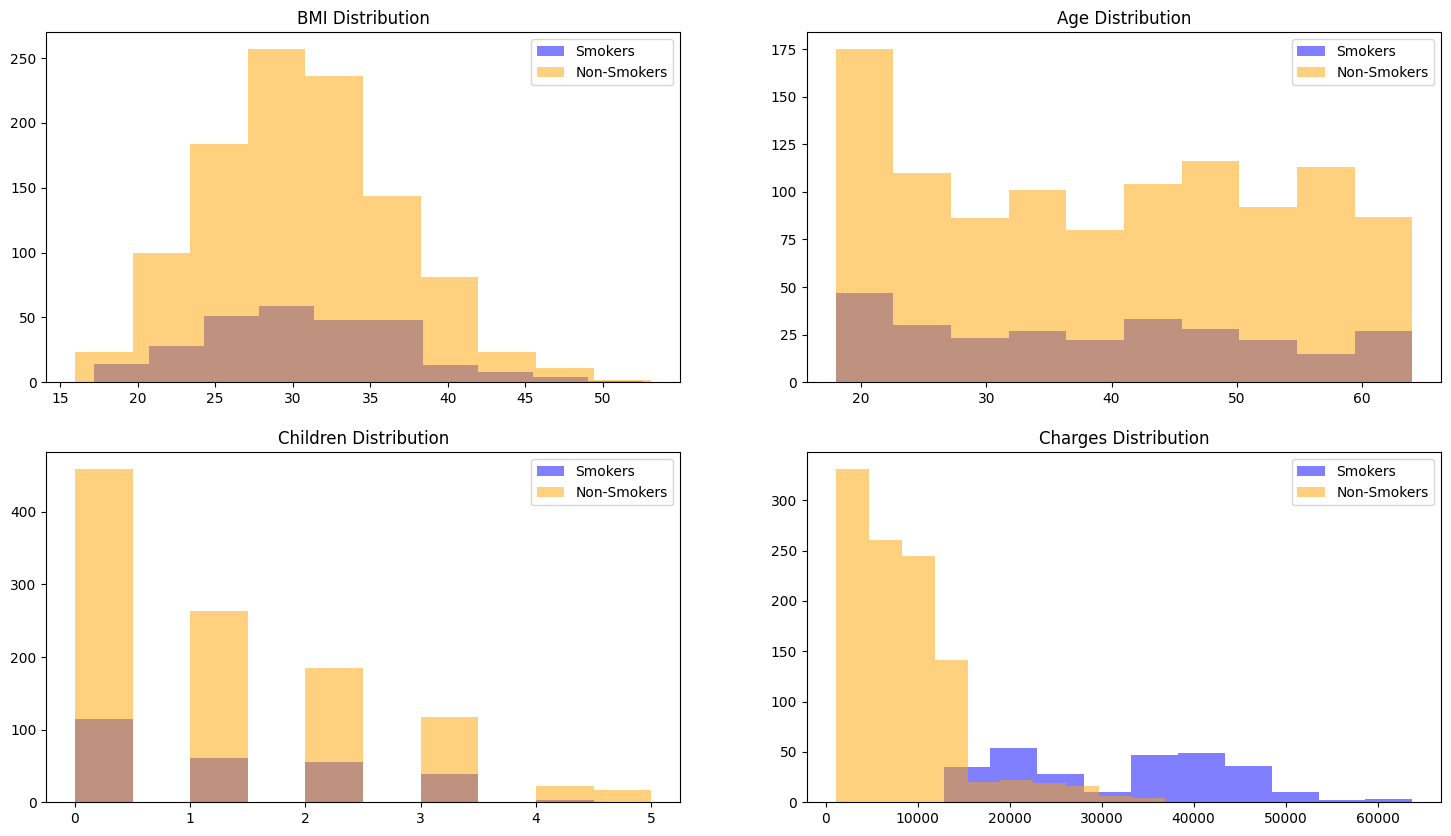

In [ ]:
# numerical_features = ['age', 'bmi', 'children', 'charges']
# for feature in numerical_features:
#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     smokers[feature].hist(bins=20, color='blue', alpha=0.5)
#     plt.title('Smokers')
#     plt.xlabel(feature)



plt.figure(figsize=(18,10))

plt.subplot(221)
bmi_smokers=smokers['bmi'].values
bmi_non_smokers=non_smokers['bmi'].values
plt.hist(bmi_smokers, color='blue',alpha=0.5, label='Smokers')
plt.hist(bmi_non_smokers, color='orange',alpha=0.5, label='Non-Smokers')
plt.title("BMI Distribution")
plt.legend()

plt.subplot(222)
age_smokers=smokers['age'].values
age_non_smokers=non_smokers['age'].values
plt.hist(age_smokers, color='blue', alpha=0.5, label='Smokers')
plt.hist(age_non_smokers, color='orange', alpha=0.5, label='Non-Smokers')
plt.title("Age Distribution")
plt.legend()


plt.subplot(223)
children_smokers=smokers['children'].values
children_non_smokers=non_smokers['children'].values
plt.hist(children_smokers, color='blue', alpha=0.5, label='Smokers')
plt.hist(children_non_smokers, color='orange', alpha=0.5, label='Non-Smokers')
plt.title("Children Distribution")
plt.legend()

plt.subplot(224)
charges_smokers=smokers['charges'].values
charges_non_smokers=non_smokers['charges'].values
plt.hist(charges_smokers, color='blue', alpha=0.5, label='Smokers')
plt.hist(charges_non_smokers, color='orange', alpha=0.5, label='Non-Smokers')
plt.title("Charges Distribution")
plt.legend()


In [ ]:
most_significant_feature =['charges']

Now let's see if the gender influences being a smoker or not.
To do so, perform crosstabbing between gender and smoker. Plot the results of the crosstab, and check who smokes more (simply type: male, female, or none)


smoker   no  yes
sex             
female  547  115
male    517  159


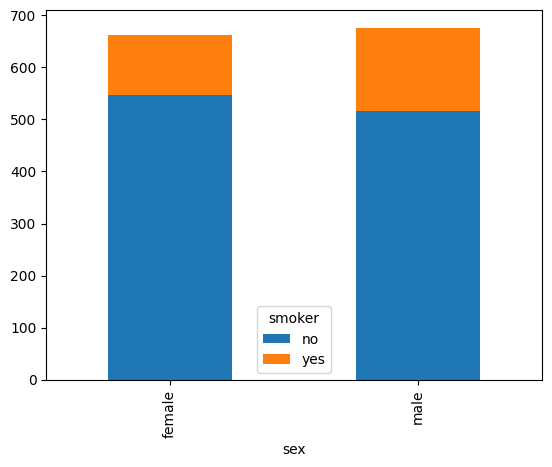

In [ ]:
Gender = pd.crosstab(data['sex'],data['smoker'])
Gender.plot.bar(stacked=True)
print(Gender)

In [ ]:
gender_that_smokes_more = 'male'

Do the same for the region and tell which region has the most smokers (answer by the type of region, or simply answe none)

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


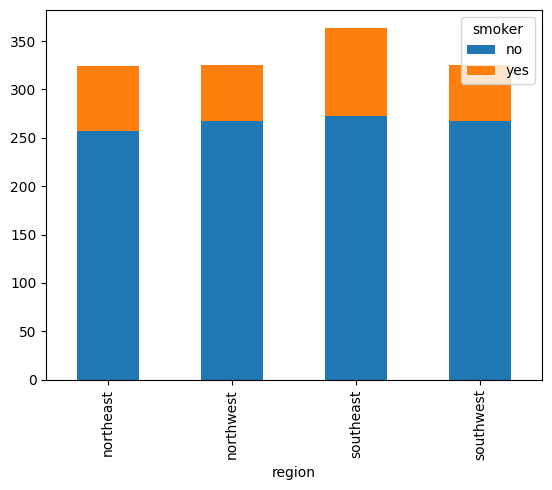

In [ ]:
Region = pd.crosstab(data['region'],data['smoker'])
Region.plot.bar(stacked=True)
print(Region)

In [ ]:
region_with_most_smokers = "southeast"

Also here we have a slight difference.

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---





 Let's start by removing missing data.

In [ ]:
data_no_nulls = data.dropna()


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.
*   We need to convert the region column from (northeast, northwest, etc.) to 0,1,2,etc.

**Use the data_no_nulls dataframe**

Start with the 'sex' column



In [ ]:
genders_dic = {'male':0, 'female':1}
data_no_nulls['sex']= data_no_nulls['sex'].apply(lambda x: genders_dic[x])
data_no_nulls.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


And now the smokers column

In [ ]:
smokers_dic={'no':0, 'yes':1}
data_no_nulls['smoker']= data_no_nulls['smoker'].apply(lambda x: smokers_dic[x])
data_no_nulls.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


And now the Region Column

In [ ]:
Region_dic={'northeast':0, 'northwest':1, 'southeast':2, 'southwest':3}
data_no_nulls['region']= data_no_nulls['region'].apply(lambda x: Region_dic[x])
data_no_nulls

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


#### Normalization

Let's scale all the columns by dividing by the maximum and saving the result in **final_df**

In [ ]:
final_df = data_no_nulls.divide(data_no_nulls.max())
final_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.504619,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.368180,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.333333,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.666667,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.666667,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%) with random state of 42

In [ ]:
from sklearn.model_selection import train_test_split

X = final_df.drop('smoker', axis=1)
y = final_df['smoker']


# split dataset in a 80/20 split with random state of 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


#### Logistic Regression Modeling


Create a logistic regression model named *model_1* and train it on the *x_train_1* and *y_train_1*

In [ ]:
from sklearn.linear_model import LogisticRegression
# define our logistic regression model
model_1 = LogisticRegression()
# train our model
model_1.fit(x_train, y_train)

LogisticRegression()

#### Evaluation
Compute accuracy, precision and recall for the model on the test set.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_1 = model_1.predict(x_test)


accuracy_model_1 = accuracy_score(y_test, y_pred_1)
precision_model_1 = precision_score(y_test, y_pred_1)
recall_model_1 = recall_score(y_test, y_pred_1)
f1_score_model_1 = f1_score(y_test, y_pred_1)

print("Accuracy:", accuracy_model_1,
      "\nPrecision:",precision_model_1,
      "\nRecall:", recall_model_1,
      "\nF1 Score:", f1_score_model_1)

Accuracy: 0.898876404494382 
Precision: 0.9523809523809523 
Recall: 0.6153846153846154 
F1 Score: 0.7476635514018691


We can see that the recall, and the f1 score can be improved.

## 5. Model Improvement

Now we will try to improve the model that we built.

#### Handle data Imbalance

1. Plot a bar plot for the smoker column.

2. We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

3. Plot a bar plot for the smoker column after balancing

<Axes: xlabel='smoker'>

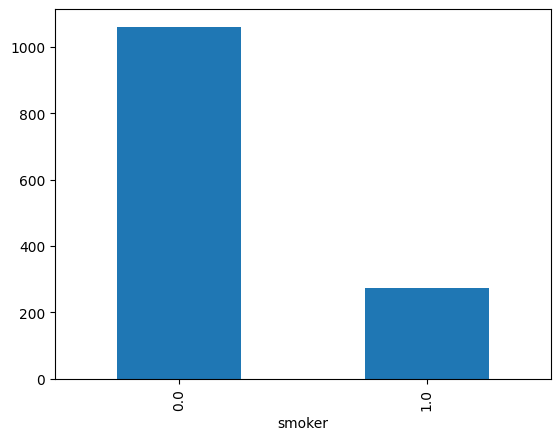

In [ ]:
final_df.smoker.value_counts().plot.bar()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversample= RandomOverSampler(sampling_strategy=0.5)
x_new, y_new = oversample.fit_resample(X, y)

undersample = RandomUnderSampler(sampling_strategy='majority')
x_new, y_new = undersample.fit_resample(x_new, y_new)

<Axes: xlabel='smoker'>

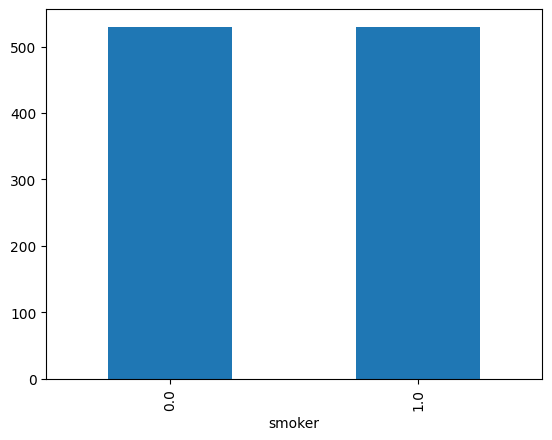

In [ ]:
z = y_new.value_counts()
z.plot.bar()

Train the model on the balanced dataset. Don't forget to split between training and testing. Also use a random state of 42

In [ ]:
z=np.array([y_new]).transpose()
new_data =np.hstack([x_new,z])
new_data_df=pd.DataFrame(new_data)
new_data_df.columns = ['age', 'sex', 'bmi', 'children', 'region', 'charges','smoker']
final_df=new_data_df
final_df.head()

,age,sex,bmi,children,region,charges,smoker
0,0.859375,1.0,0.609731,0.2,0.000000,0.186279,0.0
1,0.781250,1.0,0.481837,0.0,1.000000,0.140066,0.0
2,0.406250,0.0,0.548654,0.2,0.666667,0.045521,0.0
3,0.281250,0.0,0.641822,0.0,0.666667,0.017830,0.0
4,0.296875,0.0,0.534538,0.2,1.000000,0.028893,0.0


In [ ]:
from ast import mod
input_new_data=final_df.drop('smoker', axis=1)
output_new_data=final_df['smoker']
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(input_new_data, output_new_data, test_size= 0.2, random_state=42)

model_new = LogisticRegression()
model_new.fit(x_new_train, y_new_train)

LogisticRegression()

Evaluate the model on the test set

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_new= model_new.predict(x_new_test)

accuracy_model_2 = accuracy_score(y_new_test, y_pred_new)
precision_model_2 = precision_score(y_new_test, y_pred_new)
recall_model_2 = recall_score(y_new_test, y_pred_new)
f1_score_model_2 = f1_score(y_new_test, y_pred_new)

print("Accuracy:", accuracy_model_2,
      "\nPrecision:",precision_model_2,
      "\nRecall:", recall_model_2,
      "\nF1 Score:", f1_score_model_2)

Accuracy: 0.9669811320754716 
Precision: 0.9339622641509434 
Recall: 1.0 
F1 Score: 0.9658536585365853


We can see how much our scores got better when we balanced our dataset.

#### Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
#Create a logistic regression model named LR and choose the liblinear solver because it supports the L1 regularization
LR = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']}
clf = GridSearchCV(LogisticRegression(), LR, cv=5, n_jobs=-1)
clf.fit(x_new_train, y_new_train)
print("Best Score is:",clf.best_score_,"\nBest Parameters are:",clf.best_params_)

LRparam_grid = LogisticRegression(C=10, penalty='l1', solver='liblinear')
LRparam_grid.fit(x_new_train, y_new_train)
y_pred_improved =LRparam_grid.predict(x_new_test)
print("Accuracy:",accuracy_score(y_new_test, y_pred_improved),"\nPrecision:",precision_score(y_new_test, y_pred_improved),"\nRecall:",recall_score(y_new_test, y_pred_improved),"\nF1 Score:",f1_score(y_new_test, y_pred_improved))


Best Score is: 0.9776052906369648 
Best Parameters are: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9716981132075472 
Precision: 0.9428571428571428 
Recall: 1.0 
F1 Score: 0.9705882352941176


We're seeing in the results, for each combination of hyperparameters how good the model is performing.

Let's assess the model's performance in general for those specified hyperparameters.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
LR = ...
...

y_pred = ...

accuracy_model_3 = ...
precision_model_3 = ...
recall_model_3 = ...
f1_score_model_3 = ...

print("Accuracy:", accuracy_model_3,
      "\nPrecision:",precision_model_3,
      "\nRecall:", recall_model_3,
      "\nF1 Score:", f1_score_model_3)

We can see that the results improved compared to the last model we built.

#### AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week.
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well he performed on the training data. And after that, different results are aggregated based on weighted averaging.

Build an adaboost model with 10 estimators and train it on the balanced dataset.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = ...
...

Evaluate the model on the test set

In [ ]:
y_pred = ...
accuracy_model_4 = ...
precision_model_4 = ...
recall_model_4 = ...
f1_score_model_4 = ...

print("Accuracy:", accuracy_model_4,
      "\nPrecision:",precision_model_4,
      "\nRecall:", recall_model_4,
      "\nF1 Score:", f1_score_model_4)

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. **Download your notebook as .ipynb file and put it in a zip folder along with the PART A explanation, then upload that folder to the platform**